In [33]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as pplt
import matplotlib

In [21]:
#read data
watches_review = pd.read_csv('amazon_reviews_us_Watches_v1_00.tsv',sep='\t',error_bad_lines = False)

Skipping line 8704: expected 15 fields, saw 22
Skipping line 16933: expected 15 fields, saw 22
Skipping line 23726: expected 15 fields, saw 22

Skipping line 85637: expected 15 fields, saw 22

Skipping line 132136: expected 15 fields, saw 22
Skipping line 158070: expected 15 fields, saw 22
Skipping line 166007: expected 15 fields, saw 22
Skipping line 171877: expected 15 fields, saw 22
Skipping line 177756: expected 15 fields, saw 22
Skipping line 181773: expected 15 fields, saw 22
Skipping line 191085: expected 15 fields, saw 22
Skipping line 196273: expected 15 fields, saw 22
Skipping line 196331: expected 15 fields, saw 22

Skipping line 197000: expected 15 fields, saw 22
Skipping line 197011: expected 15 fields, saw 22
Skipping line 197432: expected 15 fields, saw 22
Skipping line 208016: expected 15 fields, saw 22
Skipping line 214110: expected 15 fields, saw 22
Skipping line 244328: expected 15 fields, saw 22
Skipping line 248519: expected 15 fields, saw 22
Skipping line 254936: 

In [22]:
print(watches_review.columns.values)

['marketplace' 'customer_id' 'review_id' 'product_id' 'product_parent'
 'product_title' 'product_category' 'star_rating' 'helpful_votes'
 'total_votes' 'vine' 'verified_purchase' 'review_headline' 'review_body'
 'review_date']


In [23]:
watches_review.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,N,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31
1,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,N,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31
2,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,N,Y,Two Stars,Scratches,2015-08-31
3,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,N,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31
4,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,N,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31


In [24]:
watches_review.tail()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
960199,US,39508379,REH8UQZAXQS40,B00005OT9I,2153632,Xhilaration&#174; Silver Dial Bangle Watch,Watches,2,17,17,N,N,Great prize - but size??,It's a great watch - but you don't have a chan...,2001-12-13
960200,US,44704251,RJ14QPZEOI9P8,B00005QEM6,903687397,Armitron Men's Titanium 3 Eye Sport Analog Chr...,Watches,5,9,10,N,N,A very classy watch!,"Well worth the price. This is a light weight, ...",2001-11-08
960201,US,40571775,R2B1G5650WWFCE,B00005QEME,252821780,Men's Timex Internet Messenger Sport Watch,Watches,5,3,16,N,N,This is a great watch,"Dear Targeteers,<BR>This watch is exelent. it ...",2001-11-06
960202,US,44474855,R2MMGPUWXXOFI2,B00004YK0H,118389241,Energizer 393 Button Cell Battery,Watches,4,0,0,N,N,Now watt a minute here.,"In the old days, the common hearing battery in...",2001-04-05
960203,US,44474855,R2BZMVAERMRUDE,B00004YK0H,118389241,Energizer 393 Button Cell Battery,Watches,4,5,7,N,N,1/10 Watt difference for hearing aids,I have found that a #393 watch battery is the ...,2001-04-05


In [25]:
watches_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960204 entries, 0 to 960203
Data columns (total 15 columns):
marketplace          960204 non-null object
customer_id          960204 non-null int64
review_id            960204 non-null object
product_id           960204 non-null object
product_parent       960204 non-null int64
product_title        960202 non-null object
product_category     960204 non-null object
star_rating          960204 non-null int64
helpful_votes        960204 non-null int64
total_votes          960204 non-null int64
vine                 960204 non-null object
verified_purchase    960204 non-null object
review_headline      960197 non-null object
review_body          960056 non-null object
review_date          960200 non-null object
dtypes: int64(5), object(10)
memory usage: 109.9+ MB


In [26]:
watches_review.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,9.602040e+05,9.602040e+05,960204.000000,960204.000000,960204.000000
mean,2.600101e+07,5.060448e+08,4.138161,1.197180,1.561571
std,1.581616e+07,2.864151e+08,1.293327,8.163426,9.071388
min,1.001600e+04,4.384000e+03,1.000000,0.000000,0.000000
25%,1.280548e+07,2.588358e+08,4.000000,0.000000,0.000000
50%,2.396748e+07,5.166657e+08,5.000000,0.000000,0.000000
75%,4.108624e+07,7.491827e+08,5.000000,1.000000,1.000000
max,5.309646e+07,9.999979e+08,5.000000,4004.000000,4249.000000


In [27]:
products = watches_review['star_rating'].groupby(watches_review['product_id']).count()
print('Number of unique products (in watches) is {}'.format(products.count()))

Number of unique products (in watches) is 149658


In [28]:
# see top 20 most reviewed products
sorted_products = products.sort_values(ascending=False)

print("Top 20 reviewed products are: \n")
print(sorted_products[:20])
print('Most Reviewed Product, B000T9VK56 - has {} reviews.'.format(products.max()))

Top 20 reviewed products are: 

product_id
B000T9VK56    4390
B004YM2FV2    3050
B005JVP0LE    2047
B002SSUQFG    1945
B008D902Q2    1884
B000AR7S3A    1516
B000JQJS6M    1465
B00791QYMQ    1421
B000EQS1JW    1410
B000GAWSHM    1309
B000GAYQLI    1308
B000GAYQKY    1254
B000LTAY1U    1238
B000GAWSDG    1208
B000JQFX1G    1161
B00791R1MI    1101
B0006AAS7E    1089
B004VR9HP2    1058
B003DZDYMU    1044
B004VR9GCQ    1022
Name: star_rating, dtype: int64
Most Reviewed Product, B000T9VK56 - has 4390 reviews.


In [29]:
# select verified purchases
verified = watches_review[watches_review['verified_purchase']=='Y']
# select non-verified reviews
not_verified = watches_review[watches_review['verified_purchase'] == 'N']

In [30]:
# see the head and tails of reviews
verified.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,N,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31
1,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,N,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31
2,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,N,Y,Two Stars,Scratches,2015-08-31
3,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,N,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31
4,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,N,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31


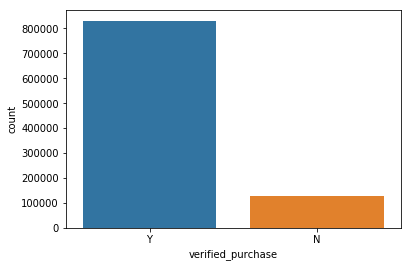

In [31]:
sns.countplot(watches_review['verified_purchase'],label="Verified purchases")

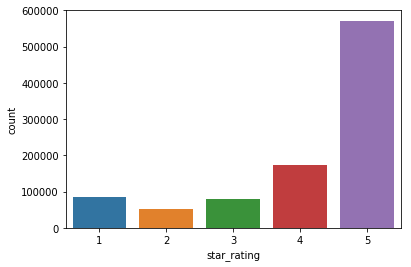

In [32]:
sns.countplot(x='star_rating',data = watches_review)

In [34]:
verified = verified.drop(columns="review_headline")

In [43]:
verified = verified.drop(columns="review_body")

KeyError: "['review_body'] not found in axis"

In [44]:
verified= verified.drop(columns="marketplace")

In [57]:
verified= verified.drop(columns="vine")

KeyError: "['vine'] not found in axis"

In [58]:
verified

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,verified_purchase,review_date
0,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,Y,2015-08-31
1,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,Y,2015-08-31
2,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,Y,2015-08-31
3,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,Y,2015-08-31
4,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,Y,2015-08-31
5,6576411,RA51CP8TR5A2L,B00EYSOSE8,230493695,Casio Men's GW-9400BJ-1JF G-Shock Master of G ...,Watches,5,0,0,Y,2015-08-31
6,11811565,RB2Q7DLDN6TH6,B00WM0QA3M,549298279,Fossil Women's ES3851 Urban Traveler Multifunc...,Watches,5,1,1,Y,2015-08-31
8,45925069,R2Z6JOQ94LFHEP,B00MAMPGGE,263720892,G-Shock Men's Grey Sport Watch,Watches,5,1,2,Y,2015-08-31
9,44751341,RX27XIIWY5JPB,B004LBPB7Q,124278407,Heiden Quad Watch Winder in Black Leather,Watches,4,0,0,Y,2015-08-31
10,9962330,R15C7QEZT0LGZN,B00KGTVGKS,28017857,Fossil Women's ES3621 Serena Crystal-Accented ...,Watches,4,2,2,Y,2015-08-31


In [50]:
productsV = verified['star_rating'].groupby(verified['product_id']).count()
print('Number of unique products (in watches) is {}'.format(products.count()))

Number of unique products (in watches) is 132455


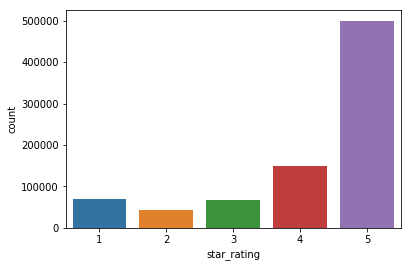

In [51]:
sns.countplot(x='star_rating',data = verified)

In [52]:
# see top 20 most reviewed products
sorted_productsV = productsV.sort_values(ascending=False)

print("Top 20 reviewed products are: \n")
print(sorted_products[:20])
print('Most Reviewed Product, B000T9VK56 - has {} reviews.'.format(productsV.max()))

Top 20 reviewed products are: 

product_id
B000T9VK56    4169
B004YM2FV2    2760
B005JVP0LE    1935
B002SSUQFG    1810
B008D902Q2    1747
B000AR7S3A    1383
B000JQJS6M    1347
B00791QYMQ    1336
B000EQS1JW    1207
B000GAWSHM    1204
B000GAYQLI    1149
B000LTAY1U    1144
B000GAYQKY    1118
B000GAWSDG    1084
B000JQFX1G    1050
B00791R1MI    1031
B003DZDYMU     995
B0006AAS7E     982
B004VR9HP2     963
B004VR9GCQ     951
Name: star_rating, dtype: int64
Most Reviewed Product, B000T9VK56 - has 4169 reviews.


In [59]:
verified.dtypes

customer_id           int64
review_id            object
product_id           object
product_parent        int64
product_title        object
product_category     object
star_rating           int64
helpful_votes         int64
total_votes           int64
verified_purchase    object
review_date          object
dtype: object

In [61]:
verified['review_date'] = pd.to_datetime(verified.review_date) 
verified

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,verified_purchase,review_date
0,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,Y,2015-08-31
1,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,Y,2015-08-31
2,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,Y,2015-08-31
3,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,Y,2015-08-31
4,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,Y,2015-08-31
5,6576411,RA51CP8TR5A2L,B00EYSOSE8,230493695,Casio Men's GW-9400BJ-1JF G-Shock Master of G ...,Watches,5,0,0,Y,2015-08-31
6,11811565,RB2Q7DLDN6TH6,B00WM0QA3M,549298279,Fossil Women's ES3851 Urban Traveler Multifunc...,Watches,5,1,1,Y,2015-08-31
8,45925069,R2Z6JOQ94LFHEP,B00MAMPGGE,263720892,G-Shock Men's Grey Sport Watch,Watches,5,1,2,Y,2015-08-31
9,44751341,RX27XIIWY5JPB,B004LBPB7Q,124278407,Heiden Quad Watch Winder in Black Leather,Watches,4,0,0,Y,2015-08-31
10,9962330,R15C7QEZT0LGZN,B00KGTVGKS,28017857,Fossil Women's ES3621 Serena Crystal-Accented ...,Watches,4,2,2,Y,2015-08-31


In [63]:
verified.dtypes

customer_id                   int64
review_id                    object
product_id                   object
product_parent                int64
product_title                object
product_category             object
star_rating                   int64
helpful_votes                 int64
total_votes                   int64
verified_purchase            object
review_date          datetime64[ns]
dtype: object

In [70]:
verified.review_date.dt.year

0         2015.0
1         2015.0
2         2015.0
3         2015.0
4         2015.0
5         2015.0
6         2015.0
8         2015.0
9         2015.0
10        2015.0
12        2015.0
13        2015.0
14        2015.0
15        2015.0
16        2015.0
17        2015.0
18        2015.0
19        2015.0
20        2015.0
21        2015.0
22        2015.0
23        2015.0
24        2015.0
26        2015.0
27        2015.0
28        2015.0
29        2015.0
30        2015.0
31        2015.0
32        2015.0
           ...  
959902    2004.0
959912    2004.0
959920    2004.0
959945    2004.0
959957    2004.0
959961    2004.0
959962    2004.0
959964    2004.0
959970    2004.0
959971    2004.0
959995    2004.0
960004    2004.0
960019    2004.0
960036    2004.0
960038    2004.0
960039    2004.0
960047    2004.0
960058    2004.0
960062    2004.0
960087    2003.0
960105    2003.0
960107    2003.0
960115    2003.0
960116    2003.0
960119    2003.0
960159    2003.0
960160    2003.0
960185    2002